# Neural Netwoek Notebook

In this notebook, read the data and clean it, then normalize it and use it as the input of neural nework

## Reading data and do the pre-processing and preparing data for classification algorithms

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
import umap
import imblearn
import category_encoders as ce

## Reading data 

In [73]:
data = pd.read_csv('DS_MiniProject_ANON-Copy1.csv')
data.head()

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,...,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,...,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,...,0,0,6,0,0,0,0,0,0,0
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


## Pre-Processin the data
### Find the Shape and Missing values of each feature

In [74]:
features_list = data.columns.values
print('Features: \n', features_list)
print('data_shape:', data.shape)
print('Missing values:', data.isnull().sum())

Features: 
 ['DATE_FOR' 'RTD_ST_CD' 'CustomerSegment' 'Tenure' 'Age' 'MART_STATUS'
 'GENDER' 'CHANNEL1_6M' 'CHANNEL2_6M' 'CHANNEL3_6M' 'CHANNEL4_6M'
 'CHANNEL5_6M' 'METHOD1_6M' 'RECENT_PAYMENT' 'PAYMENTS_6M' 'CHANNEL1_3M'
 'CHANNEL2_3M' 'CHANNEL3_3M' 'CHANNEL4_3M' 'CHANNEL5_3M' 'METHOD1_3M'
 'PAYMENTS_3M' 'NOT_DI_3M' 'NOT_DI_6M' 'EVENT1_30_FLAG' 'EVENT2_90_SUM'
 'LOGINS' 'POLICYPURCHASECHANNEL' 'Call_Flag']
data_shape: (130086, 29)
Missing values: DATE_FOR                   0
RTD_ST_CD                  0
CustomerSegment            0
Tenure                     0
Age                        0
MART_STATUS                0
GENDER                     0
CHANNEL1_6M              809
CHANNEL2_6M              809
CHANNEL3_6M              809
CHANNEL4_6M              809
CHANNEL5_6M              809
METHOD1_6M               809
RECENT_PAYMENT           809
PAYMENTS_6M              809
CHANNEL1_3M                0
CHANNEL2_3M                0
CHANNEL3_3M                0
CHANNEL4_3M               

In [75]:
data.dropna(inplace=True)
print('clean_data_shape:', data.shape)
data.drop(['DATE_FOR'], axis=1, inplace=True)
data.describe()

clean_data_shape: (129277, 29)


,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,...,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.0,129277.000000,129277.000000,129277.000000,129277.000000
mean,8.591581,48.813929,0.261810,0.948467,0.811652,0.401216,0.569823,1.834425,0.105680,4.848333,...,0.285333,0.914494,2.427145,0.056019,0.080502,0.0,0.193522,0.953774,0.131284,0.036549
std,7.297798,14.037131,1.092346,1.880123,1.824188,1.065413,1.628655,2.596754,0.307429,2.027548,...,0.850155,1.388627,1.211655,0.229960,0.272069,0.0,0.509437,2.149006,0.337712,0.187654
min,0.032854,16.689938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.252567,37.845311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,7.006160,49.111567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,11.630390,58.830938,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,...,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
max,63.091034,99.348392,12.000000,53.000000,26.000000,18.000000,29.000000,53.000000,1.000000,53.000000,...,16.000000,36.000000,36.000000,1.000000,1.000000,0.0,4.000000,45.000000,1.000000,1.000000


### Calculate the percentage of calls
Take a look at the distribution of the calls

length of dataset: 130086
All calls: 4764
Not_call: 125322
Percentage of Calls: 0.036621927032885936


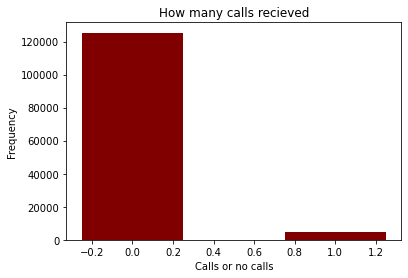

In [27]:
counts = data['Call_Flag'].value_counts()
calls = counts[1]
non_calls = counts[0]
print('length of dataset:', len(data))
print('All calls:',calls )
print('Not_call:',non_calls )
print('Percentage of Calls:', calls/(non_calls+calls))

fig = plt.figure(figsize = (6, 4))  
# creating the bar plot 
plt.bar([0,1], data['Call_Flag'].value_counts(), color ='maroon',  
        width = 0.5)   
plt.xlabel("Calls or no calls") 
plt.ylabel("Frequency") 
plt.title("How many calls recieved") 
plt.show()

## Data Visualization 
Visualization of the dataset 

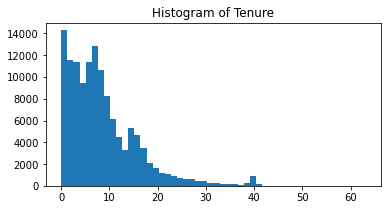

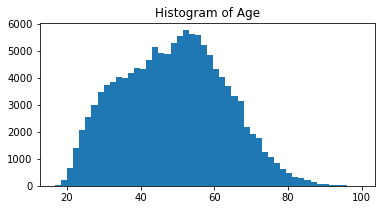

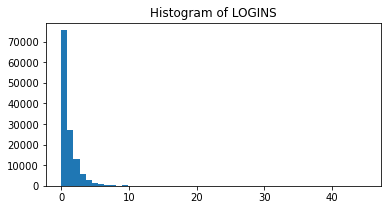

In [9]:
Hist_list = ['Tenure', 'Age','LOGINS' ]
n_bins = 50 

for column_name in Hist_list:
    ax=plt.subplots(figsize=(6,3))
    # get data by column_name and display a histogram
    ax = plt.hist(data[column_name], bins=n_bins)
    title="Histogram of " + column_name
    plt.title(title, fontsize=12)
    plt.show()

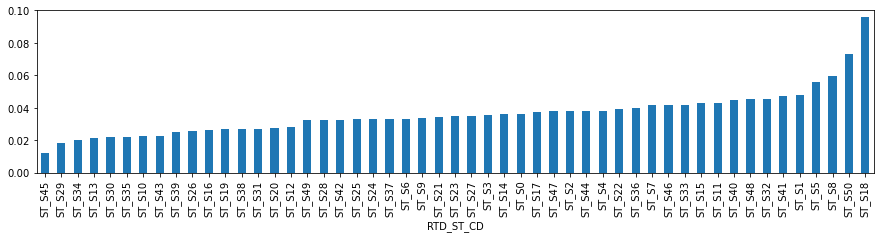

In [10]:
data.groupby("RTD_ST_CD")["Call_Flag"].mean().sort_values().plot(kind="bar", figsize=(15,3))

In [76]:
data = data.drop(['CHANNEL1_6M','CHANNEL2_6M','CHANNEL3_6M','CHANNEL5_6M','METHOD1_3M'], axis=1)
data.shape

(129277, 23)

In [77]:
data = data.drop(data.columns[(data == 0).all()][0], axis=1)

## Encoding
Different encoding methods, 1) simple mapping 2) Dummies encoding 3) Hashing 

In [28]:
obj_data = data.select_dtypes(include=['object']).copy()
obj_data.head()

# 1) FIND AND REPLACE:
cleanup_nums = {"RTD_ST_CD":     {"ST_S1": 1, "ST_S2": 2, "ST_S3": 3, "ST_S4": 4,"ST_S5": 5, "ST_S6": 6,
                                 "ST_S7": 7, "ST_S8": 8,"ST_S9": 9, "ST_S10": 10,"ST_S11": 11, "ST_S12": 12,
                                 "ST_S13": 13, "ST_S14": 14,"ST_S15": 15, "ST_S16": 16,"ST_S17": 17, "ST_S18": 18,
                                 "ST_S19": 19, "ST_S20": 20,"ST_S21": 21, "ST_S22": 22,"ST_S23": 23, "ST_S24": 24,
                                 "ST_S25": 25, "ST_S26": 26,"ST_S27": 27, "ST_S28": 28,"ST_S29": 29, "ST_S30": 30,
                                 "ST_S31": 31, "ST_S32": 32,"ST_S33": 33, "ST_S34": 34,"ST_S35": 35, "ST_S36": 36,
                                 "ST_S37": 37, "ST_S38": 38,"ST_S39": 39, "ST_S40": 40,"ST_S41": 41, "ST_S42": 42,
                                 "ST_S43": 43, "ST_S44": 44,"ST_S45": 45, "ST_S46": 46,"ST_S47": 47, "ST_S48": 48,
                                 "ST_S49": 49, "ST_S50": 50, "ST_S0": 0},
                "CustomerSegment": {"1": 1, "2": 2, "3": 3, "NONE": 0},
                "MART_STATUS": {"MS_S0": 0, "MS_S1": 1, "MS_S2": 2, "MS_S3": 3, "MS_S4": 4},
                "GENDER": {"F": 1, "M": 0}}

obj_data.replace(cleanup_nums, inplace=True)
obj_data.head()
data.replace(cleanup_nums, inplace=True)



In [29]:
# feature representation with imputing unknown variabl 

import category_encoders as ce

encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=['RTD_ST_CD','MART_STATUS', 'CustomerSegment','GENDER'])
encoder.fit(data, verbose=1)

enc_Back = encoder.transform(data)
enc_Back

,intercept,DATE_FOR,RTD_ST_CD_0,RTD_ST_CD_1,RTD_ST_CD_2,RTD_ST_CD_3,RTD_ST_CD_4,RTD_ST_CD_5,RTD_ST_CD_6,RTD_ST_CD_7,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,1,5/19/2014,-0.980392,-0.960784,-0.941176,-0.921569,-0.901961,-0.882353,-0.862745,-0.843137,...,2,0,3,0,0,0,0,0,0,0
1,1,5/17/2014,-0.980392,-0.960784,-0.941176,-0.921569,-0.901961,-0.882353,-0.862745,-0.843137,...,0,3,3,0,0,0,0,0,0,0
2,1,5/15/2014,-0.980392,-0.960784,-0.941176,-0.921569,-0.901961,-0.882353,-0.862745,-0.843137,...,0,0,6,0,0,0,0,0,0,0
3,1,5/16/2014,0.019608,-0.960784,-0.941176,-0.921569,-0.901961,-0.882353,-0.862745,-0.843137,...,0,0,0,0,0,0,0,0,1,0
4,1,5/20/2014,-0.980392,-0.960784,-0.941176,-0.921569,-0.901961,-0.882353,-0.862745,-0.843137,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130081,1,5/17/2014,0.019608,0.039216,0.058824,0.078431,0.098039,0.117647,0.137255,0.156863,...,0,0,1,0,0,0,0,0,0,0
130082,1,5/19/2014,0.019608,0.039216,0.058824,0.078431,0.098039,0.117647,0.137255,0.156863,...,0,0,2,0,0,0,0,0,0,0
130083,1,5/16/2014,0.019608,0.039216,0.058824,0.078431,0.098039,0.117647,0.137255,0.156863,...,0,0,1,0,0,0,0,0,0,0
130084,1,5/15/2014,0.019608,0.039216,0.058824,0.078431,0.098039,0.117647,0.137255,0.156863,...,0,0,1,0,0,0,0,0,0,0


In [78]:
hash_enc = ce.HashingEncoder(cols=['RTD_ST_CD','MART_STATUS', 'CustomerSegment','GENDER'])
hash_enc.fit(data)
enc_data = hash_enc.transform(data)
input_dimension = enc_data.shape[1]

In [79]:
import sklearn
from sklearn.model_selection import train_test_split

x_all = enc_data.drop("Call_Flag", axis=1)
y_all = data["Call_Flag"]
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all,test_size=0.2,random_state=10)


## Normalizing the data

In [80]:
from sklearn import preprocessing

binary_features = ['col_0','col_1','col_2','col_5','col_6','col_7','RECENT_PAYMENT','NOT_DI_6M','NOT_DI_3M','POLICYPURCHASECHANNEL']

X_train_n = X_train.drop(binary_features, axis=1)
data_train_numpy = X_train_n.values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data_train_numpy)
data_train_normal = pd.DataFrame(data_scaled)
data_train_normal = pd.concat([data_train_normal.reset_index(), X_train.loc[:,binary_features].reset_index()], axis=1)
data_train_normal = data_train_normal.drop(['index'],axis=1)
print('train data shape:', data_train_normal.shape)

train data shape: (103421, 25)


In [81]:
X_test_n = X_test.drop(binary_features, axis=1)
data_test_numpy = X_test_n.values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data_test_numpy)
data_test_normal = pd.DataFrame(data_scaled)

data_test_normal = pd.concat([data_test_normal.reset_index(),X_test[binary_features].reset_index()], axis=1)
data_test_normal = data_test_normal.drop(['index'],axis=1)
print('test data shape:', data_test_normal.shape)

test data shape: (25856, 25)


# DNN

Importing the packges for running this model and Guassain Process hyperparameter-tunning

In [82]:
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv1D,MaxPooling1D
from keras.optimizers import adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.models import load_model
from keras.utils import to_categorical

from sklearn.utils import class_weight
import skopt
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
from skopt.plots import plot_evaluations
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Defining the model

This model has four fully connected layers. Activation function for each of the neurons in those layers is "ReLu". However, the last layer's activation function is "sigmoid" since wr are solving a binary classification problem. The optimization function applied is "Adam" with decay rate equal to 1e-6 to changing the learning rate in each step of the optimization.

In [106]:
def create_model(learning_rate,num_dense_one,num_dense_two,
                 num_dense_four,dropout_two):
    """
    Hyper-parameters:
    learning_rate:     Learning-rate for the optimizer.
    num_dense_layers:  Number of dense layers.
    """
    model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(num_dense_one,input_dim=25,activation='relu'),
    tf.keras.layers.Dense(num_dense_two ,activation='relu'),
    tf.keras.layers.Dropout(dropout_two),
    #tf.keras.layers.Dense(num_dense_three,activation='relu'),
    #tf.keras.layers.Dropout(dropout_three),
    tf.keras.layers.Dense(num_dense_four ,activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
          ])

    opt = tf.keras.optimizers.Adam(lr=learning_rate, decay=1e-6)
    
    model.compile(optimizer=opt, loss='binary_crossentropy', 
              metrics=['acc'])
    
    return model

Defining a function for saving weights of the best model

In [107]:
def log_dir_name(learning_rate, num_flt_one,
                 num_flt_two):

    # The dir-name for the TensorBoard log-dir.
    s = "./19_logs/lr_{0:.0e}_#flt_one_{1}_flt_two_{2}_/"

    # Insert all the hyper-parameters in the dir-name.
    log_dir = s.format(learning_rate,
                       num_flt_one,
                       num_flt_two)

    return log_dir

Defining hyperparameters along their ranges and types

In [111]:
#the range that learning rate start at the begining of the training
learning_rate = Real(low=1e-6, high=1e-2, prior='log-uniform',
                         name='learning_rate')
# The range that number of neurons in the first layer can varies
num_dense_one = Integer(low=18, high=22, name='num_dense_one')
# The range that number of neurons in the second layer can varies
num_dense_two = Integer(low=12, high=20, name='num_dense_two')
# The range that number of neurons in the third layer can varies
#num_dense_three = Integer(low=10, high=15, name='num_dense_three')
# The range that number of neurons in the rourth layer can varies
num_dense_four = Integer(low=4, high=12, name='num_dense_four')
# The range that weight for penalizing the majority class can varies
weight = Categorical([1.0,5.0,10.0,15.0,20.0,25], name='weight')
# Dropout range for the second layer
dropout_two = Real(low=0.0, high=0.2,
                         name='dropout_two')
#Dropout layer for the third layer
#dropout_three = Real(low=0.0, high=0.2,
#                         name='dropout_three')
#vector of hyperparameters
dimensions = [learning_rate, num_dense_one, num_dense_two,
              num_dense_four,dropout_two,weight]
#vector of default values for hyperparameters
default_parameters = [1e-4, 22, 18,6,0.0,5]
#name of the file saving the weights of the best network
path_best_model = 'best_model.h5'
#the golobal variable for controling the accuracy in hypertinning process
best_accuracy = 0.0

Defining the wrapper for functin ran for each candidate point of hyperparameters

In [115]:
@use_named_args(dimensions=dimensions)

def fitness(learning_rate,num_dense_one,num_dense_two,
            num_dense_four,dropout_two,weight):
    """
    Hyper-parameters:
    learning_rate:     Learning-rate for the optimizer.
    num_dense_layers:  Number of dense layers.
    num_dense_nodes:   Number of nodes in each dense layer.
    activation:        Activation function for all layers.
    """

    # Print the hyper-parameters.
    
    print('learning rate: {0:.1e}'.format(learning_rate))
    
    print('# nodes layer 1 : ', num_dense_one)
    
    print('# nodes layer 2: ', num_dense_two)
    print('Dropout layer 2: ', dropout_two)
    
    #print('# nodes layer 3: ', num_dense_three)
    #print('Dropout layer 2: ', dropout_three)
    
    print('# nodes layer 4: ', num_dense_four)
    
    print('weight: ', weight)
    print()
    
    # Create the neural network with these hyper-parameters.
    model = create_model(learning_rate,num_dense_one,num_dense_two,
                         num_dense_four, dropout_two)
    
    log_dir = log_dir_name(learning_rate, num_dense_one,
                 num_dense_two)
    #using tensorboard for saving the graphs of computaion and metrics
    callback_log = TensorBoard(
        log_dir=log_dir,
        histogram_freq=0,
        write_graph=True,
        write_grads=False,
        write_images=False)
    es = EarlyStopping(monitor='val_acc', mode='auto', verbose=1, patience=5)
    # Use Keras to train the model.
    weights = {0: 1.,
           1: weight}
    history = model.fit(x=data_train_normal,
                        y=y_train,
                        validation_split=0.2,
                        epochs=20,
                        batch_size=128,
                        class_weight=weights,
                        callbacks=[es, callback_log])


    # Get the classification accuracy on the validation-set
    # after the last training-epoch.
    accuracy = history.history['val_acc'][-1]

    # Print the classification accuracy.
    print()
    print("Accuracy: {0:.2%}".format(accuracy))
    print()

    # Save the model if it improves on the best-found performance.
    # We use the global keyword so we update the variable outside
    # of this function.
    global best_accuracy

    # If the classification accuracy of the saved model is improved ...
    if accuracy > best_accuracy:
        # Save the new model to harddisk.
        model.save(path_best_model)
        
        # Update the classification accuracy.
        best_accuracy = accuracy

    # Delete the Keras model with these hyper-parameters from memory.
    del model
    K.clear_session()
    
    # NOTE: Scikit-optimize does minimization so it tries to
    # find a set of hyper-parameters with the LOWEST fitness-value.
    # Because we are interested in the HIGHEST classification
    # accuracy, we need to negate this number so it can be minimized.
    return -accuracy

The hypertunning process searches among 20 vectors of hyperparameters. Each time a vector by GP(Guassian Process) is suggested
except the first time where the process gives the default vector. 

Using Gaussian process for finding the best hyperparapeters (searching among 30 points)

In [116]:
search_result = gp_minimize(func=fitness,
                            dimensions=dimensions,
                            acq_func='EI', # Expected Improvement.
                            n_calls=30,
                            x0=default_parameters)


learning rate: 1.0e-04
# nodes layer 1 :  22
# nodes layer 2:  18
Dropout layer 2:  0.0
# nodes layer 4:  6
weight:  5

Train on 82736 samples, validate on 20685 samples
Epoch 1/20
82736/82736 [==============================] - 2s 25us/sample - loss: 0.5085 - acc: 0.9626 - val_loss: 0.4238 - val_acc: 0.9629
Epoch 2/20
82736/82736 [==============================] - 2s 22us/sample - loss: 0.4098 - acc: 0.9638 - val_loss: 0.4093 - val_acc: 0.9629
Epoch 3/20
82736/82736 [==============================] - 2s 23us/sample - loss: 0.3935 - acc: 0.9638 - val_loss: 0.3943 - val_acc: 0.9629
Epoch 4/20
82736/82736 [==============================] - 2s 24us/sample - loss: 0.3779 - acc: 0.9638 - val_loss: 0.3808 - val_acc: 0.9625
Epoch 5/20
82736/82736 [==============================] - 2s 24us/sample - loss: 0.3642 - acc: 0.9630 - val_loss: 0.3685 - val_acc: 0.9609
Epoch 6/20
82736/82736 [==============================] - 2s 24us/sample - loss: 0.3519 - acc: 0.9604 - val_loss: 0.3567 - val_acc: 0.9

Epoch 17/20
82736/82736 [==============================] - 2s 27us/sample - loss: 0.6447 - acc: 0.9590 - val_loss: 0.6454 - val_acc: 0.9629
Epoch 18/20
82736/82736 [==============================] - 2s 27us/sample - loss: 0.6432 - acc: 0.9594 - val_loss: 0.6425 - val_acc: 0.9629
Epoch 00018: early stopping

Accuracy: 96.29%

learning rate: 9.1e-03
# nodes layer 1 :  19
# nodes layer 2:  16
Dropout layer 2:  0.13104006381036515
# nodes layer 4:  10
weight:  15.0

Train on 82736 samples, validate on 20685 samples
Epoch 1/20
82736/82736 [==============================] - 3s 30us/sample - loss: 0.4937 - acc: 0.8629 - val_loss: 0.4654 - val_acc: 0.8530
Epoch 2/20
82736/82736 [==============================] - 2s 26us/sample - loss: 0.4554 - acc: 0.8616 - val_loss: 0.4613 - val_acc: 0.8474
Epoch 3/20
82736/82736 [==============================] - 2s 26us/sample - loss: 0.4499 - acc: 0.8605 - val_loss: 0.4696 - val_acc: 0.8641
Epoch 4/20
82736/82736 [==============================] - 2s 24us/

Epoch 2/20
82736/82736 [==============================] - 2s 24us/sample - loss: 0.6927 - acc: 0.4584 - val_loss: 0.6922 - val_acc: 0.4922
Epoch 3/20
82736/82736 [==============================] - 2s 25us/sample - loss: 0.6922 - acc: 0.5358 - val_loss: 0.6918 - val_acc: 0.5844
Epoch 4/20
82736/82736 [==============================] - 2s 25us/sample - loss: 0.6918 - acc: 0.6357 - val_loss: 0.6914 - val_acc: 0.6826
Epoch 5/20
82736/82736 [==============================] - 2s 24us/sample - loss: 0.6913 - acc: 0.7120 - val_loss: 0.6909 - val_acc: 0.7351
Epoch 6/20
82736/82736 [==============================] - 2s 23us/sample - loss: 0.6909 - acc: 0.7576 - val_loss: 0.6905 - val_acc: 0.7748
Epoch 7/20
82736/82736 [==============================] - 2s 25us/sample - loss: 0.6904 - acc: 0.7903 - val_loss: 0.6900 - val_acc: 0.7982
Epoch 8/20
82736/82736 [==============================] - 2s 25us/sample - loss: 0.6899 - acc: 0.8090 - val_loss: 0.6896 - val_acc: 0.8155
Epoch 9/20
82736/82736 [===

82736/82736 [==============================] - 2s 23us/sample - loss: 0.5610 - acc: 0.9629 - val_loss: 0.5553 - val_acc: 0.9627
Epoch 16/20
82736/82736 [==============================] - 2s 23us/sample - loss: 0.5499 - acc: 0.9637 - val_loss: 0.5443 - val_acc: 0.9629
Epoch 17/20
82736/82736 [==============================] - 2s 24us/sample - loss: 0.5389 - acc: 0.9638 - val_loss: 0.5333 - val_acc: 0.9629
Epoch 18/20
82736/82736 [==============================] - 2s 24us/sample - loss: 0.5279 - acc: 0.9638 - val_loss: 0.5223 - val_acc: 0.9629
Epoch 19/20
82736/82736 [==============================] - 2s 24us/sample - loss: 0.5170 - acc: 0.9638 - val_loss: 0.5114 - val_acc: 0.9629
Epoch 20/20
82736/82736 [==============================] - 2s 25us/sample - loss: 0.5061 - acc: 0.9638 - val_loss: 0.5005 - val_acc: 0.9629

Accuracy: 96.29%

learning rate: 2.0e-06
# nodes layer 1 :  22
# nodes layer 2:  17
Dropout layer 2:  0.15161096104380103
# nodes layer 4:  12
weight:  1.0

Train on 82736

Epoch 14/20
82736/82736 [==============================] - 2s 28us/sample - loss: 0.7037 - acc: 0.2787 - val_loss: 0.7010 - val_acc: 0.2768
Epoch 15/20
82736/82736 [==============================] - 2s 28us/sample - loss: 0.7019 - acc: 0.3041 - val_loss: 0.6996 - val_acc: 0.3040
Epoch 16/20
82736/82736 [==============================] - 2s 28us/sample - loss: 0.7003 - acc: 0.3330 - val_loss: 0.6982 - val_acc: 0.3354
Epoch 17/20
82736/82736 [==============================] - 2s 26us/sample - loss: 0.6989 - acc: 0.3603 - val_loss: 0.6966 - val_acc: 0.3728
Epoch 18/20
82736/82736 [==============================] - 2s 26us/sample - loss: 0.6973 - acc: 0.3910 - val_loss: 0.6953 - val_acc: 0.4138
Epoch 19/20
82736/82736 [==============================] - 2s 26us/sample - loss: 0.6961 - acc: 0.4203 - val_loss: 0.6940 - val_acc: 0.4602
Epoch 20/20
82736/82736 [==============================] - 2s 26us/sample - loss: 0.6947 - acc: 0.4578 - val_loss: 0.6927 - val_acc: 0.5018

Accuracy: 50.18%

l

Plot of convergence shows the performance of each network, identified by its hyperparameters, on the validation set.

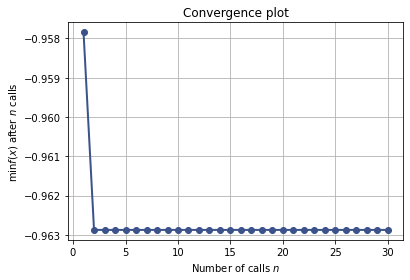

In [117]:
plot_convergence(search_result)

In [118]:
print("Best validation accuracy found in HPT process {}".format(search_result.fun))
print("Best set of hyperparameters found in HPT process {}".format(search_result.x))

Best validation accuracy found in HPT process -0.9628716707229614
Best set of hyperparameters found in HPT process [2.7437177401845647e-06, 22, 14, 7, 0.06473657619308183, 10.0]


In [148]:
weights = {0: 1.,
           1:25.0}
# uncomment only when to run a new model to delete the previous model
del model
K.clear_session()
model = create_model(2.7437177401845647e-06, 20, 10, 4, 0.0)

Showing the model parameters

In [149]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 779
Trainable params: 779
Non-trainable params: 0
_________________________________________________________________
None


In [150]:
es = EarlyStopping(monitor='val_acc', mode='auto', verbose=1, patience=5)
history = model.fit(x=X_train,
                        y=y_train,
                        epochs=40,
                        class_weight=weights,
                        validation_split=0.2,
                        batch_size=128,
                        callbacks=[es])


Train on 82736 samples, validate on 20685 samples
Epoch 1/40
82736/82736 [==============================] - 2s 28us/sample - loss: 1.2801 - acc: 0.9589 - val_loss: 1.2587 - val_acc: 0.9517
Epoch 2/40
82736/82736 [==============================] - 2s 25us/sample - loss: 1.0931 - acc: 0.9423 - val_loss: 1.1107 - val_acc: 0.9261
Epoch 3/40
82736/82736 [==============================] - 2s 24us/sample - loss: 0.9454 - acc: 0.9062 - val_loss: 0.9770 - val_acc: 0.8800
Epoch 4/40
82736/82736 [==============================] - 2s 26us/sample - loss: 0.8483 - acc: 0.8522 - val_loss: 0.8882 - val_acc: 0.8221
Epoch 5/40
82736/82736 [==============================] - 2s 25us/sample - loss: 0.7911 - acc: 0.7977 - val_loss: 0.8392 - val_acc: 0.7750
Epoch 6/40
82736/82736 [==============================] - 2s 25us/sample - loss: 0.7552 - acc: 0.7560 - val_loss: 0.8100 - val_acc: 0.7397
Epoch 00006: early stopping


In [151]:
score = model.evaluate(X_test, y_test,batch_size=128, verbose=1)
y_pred = model.predict(X_test, batch_size=128, verbose=1)
y_pred_bool = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_bool)
#print(conf_matrix)
print(conf_matrix)                             
print(classification_report(y_test, y_pred_bool))


25856/25856 [==============================] - 0s 5us/sample
[[18723  6170]
 [  534   429]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     24893
           1       0.07      0.45      0.11       963

    accuracy                           0.74     25856
   macro avg       0.52      0.60      0.48     25856
weighted avg       0.94      0.74      0.82     25856



Defining a function to show the confusion matrix

In [152]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

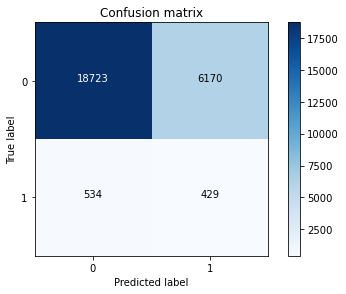

In [153]:
plot_confusion_matrix(conf_matrix, classes = [0,1])

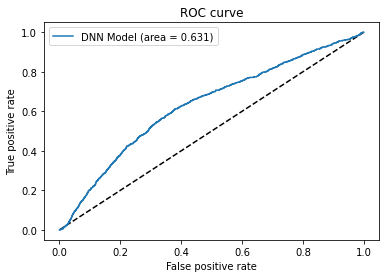

In [154]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_ = model.predict(X_test).ravel()
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_)
auc_ = auc(fpr_, tpr_)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_, tpr_, label='DNN Model (area = {:.3f})'.format(auc_))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()